# Predict Housing Price:

### 1. Import Libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Data:

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# get some descriptive statistics
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# get the count for every category
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 3. Dealing with missing data:

In [6]:
data.isna().sum()/data.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

the rows with missing values only a 1% of our data, so we will drop them.

In [7]:
# Drop rows with missing values
data.dropna(inplace=True)

In [8]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 4. Feature Selection:

In [9]:
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [10]:
corr_matrix = data[num_cols].corr()

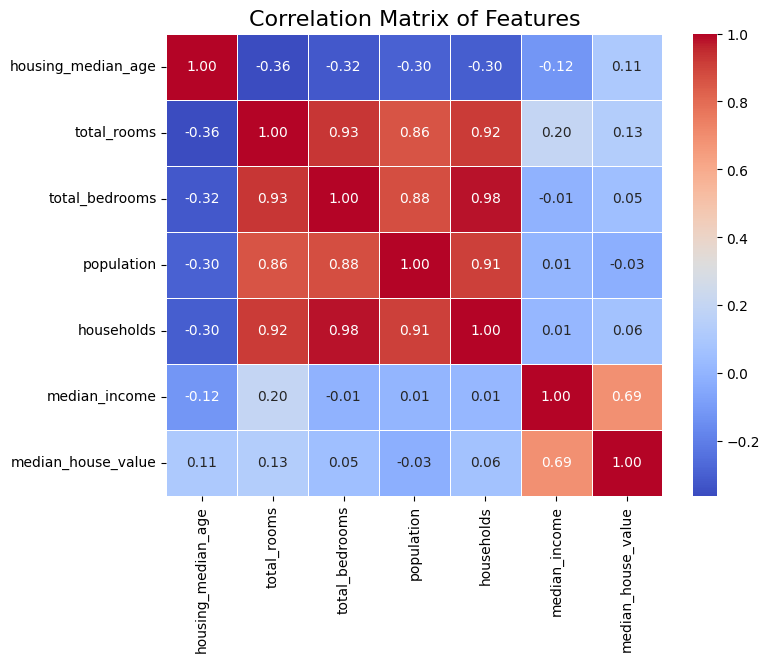

In [11]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()

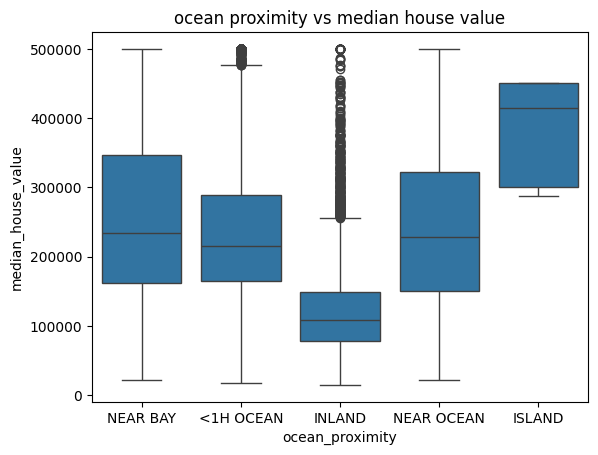

In [12]:
sns.boxplot(data, x='ocean_proximity', y='median_house_value')
plt.title('ocean proximity vs median house value')
plt.show()

I will select median_income, ocean_proximity because it contribute the most between the other features.

In [13]:
selected_feat = ['median_income', 'ocean_proximity']
X = data[selected_feat]
y = data['median_house_value']

In [14]:
X = pd.get_dummies(X)

### 5. Split the dataset into training and testing sets:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Linear Regression:

#### 6.1 Train:

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### 6.2 Predictions and evaluation:

In [17]:
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)

linear_mse_train = mean_squared_error(y_train, linear_predictions_train)
linear_mse_test = mean_squared_error(y_test, linear_predictions_test)
print(f"Training Mean Squared Error: {linear_mse_train}")
print(f"Testing Mean Squared Error: {linear_mse_test}")

Training Mean Squared Error: 5456133133.749889
Testing Mean Squared Error: 5625522895.803736


### 6.3 Interpret the MSE value:
to Interpret the MSE, it's more useful to calculate its root, to make the error with the same scale of the dependent variable.

In [18]:
print(f"Training Root Mean Squared Error: {np.sqrt(linear_mse_train)}, and the average price: {y_train.mean()}")
print(f"Testing Root Mean Squared Error: {np.sqrt(linear_mse_test)}, , and the average price: {y_test.mean()}")

Training Root Mean Squared Error: 73865.64244457561, and the average price: 206644.40009788328
Testing Root Mean Squared Error: 75003.48589101533, , and the average price: 207744.35771959872


The average price is about 200K$ and the avarage error is about 75K$.

### 7. Polynomial Regression:

#### 7.1 Creating polynomial features:

In [19]:
poly_degree = 2
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

#### 7.2 Train:

In [20]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

#### 7.3 Predictions and evaluation:

In [21]:
poly_predictions_train = poly_model.predict(X_poly_train)
poly_predictions_test = poly_model.predict(X_poly_test)
poly_mse_train = mean_squared_error(y_train, poly_predictions_train)
poly_mse_test = mean_squared_error(y_test, poly_predictions_test)
print(f"Training Mean Squared Error: {poly_mse_train}")
print(f"Testing Mean Squared Error: {poly_mse_test}")

Training Mean Squared Error: 5397950630.895831
Testing Mean Squared Error: 5571174930.686947


#### 7.4 Interpret the MSE value:
to Interpret the MSE, it's more useful to calculate its root, to make the error with the same scale of the dependent variable.

In [22]:
print(f"Training Root Mean Squared Error: {np.sqrt(poly_mse_train)}, and the average price: {y_train.mean()}")
print(f"Testing Root Mean Squared Error: {np.sqrt(poly_mse_test)}, , and the average price: {y_test.mean()}")

Training Root Mean Squared Error: 73470.74676968945, and the average price: 206644.40009788328
Testing Root Mean Squared Error: 74640.30366154031, , and the average price: 207744.35771959872


In [23]:
print(f"Different Root Mean Squared Error between polynomial and linear regression (training): {np.sqrt(linear_mse_train) - np.sqrt(poly_mse_train)}")
print(f"Different Root Mean Squared Error between polynomial and linear regression (testing): {np.sqrt(linear_mse_test) - np.sqrt(poly_mse_test)}")

Different Root Mean Squared Error between polynomial and linear regression (training): 394.8956748861674
Different Root Mean Squared Error between polynomial and linear regression (testing): 363.18222947501636


### 8. Visualization of Results:

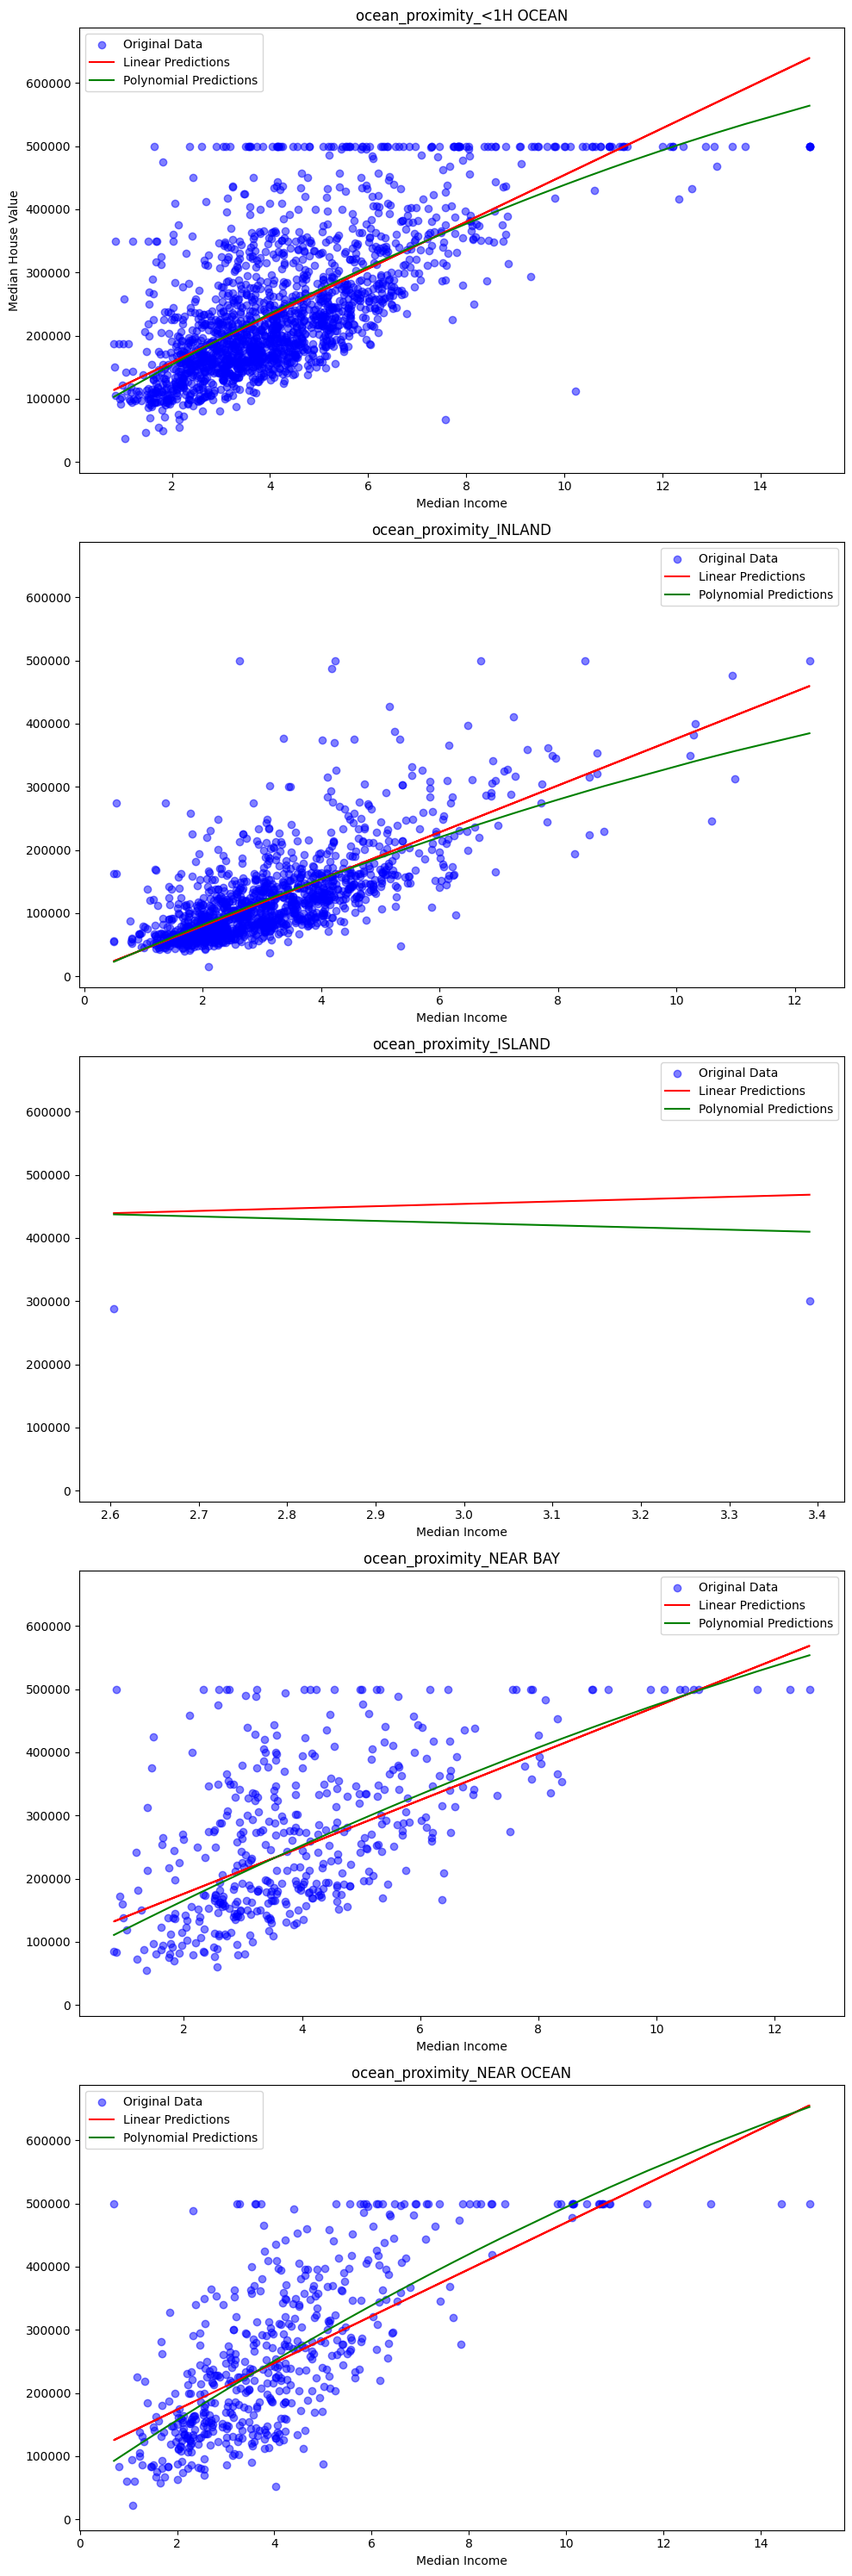

In [24]:
# Get all hot encoding categories of ocean_proximity
categories = X.columns[1:]
# make n (number of categories of ocean_proximity) rows and 1 column
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 30), sharey=True)
# Plot a (scatter plot, line plot (linear regression), and line plot (polynomial regression)) for every category.
for i, category in enumerate(categories):
    ax = axes[i]
    mask = X_test[category] == 1
    
    # Plot original data
    ax.scatter(X_test[mask]['median_income'], y_test[mask], color='blue', label='Original Data', alpha=0.5)

    # Plot Linear Regression predictions
    ax.plot(X_test[mask]['median_income'], linear_predictions_test[mask], color='red', label='Linear Predictions')

    # Plot Polynomial Regression predictions
    sorted_indices = np.argsort(X_test[mask]['median_income'].values)
    ax.plot(
        X_test[mask]['median_income'].values[sorted_indices], 
        poly_predictions_test[mask][sorted_indices], 
        color='green', label='Polynomial Predictions'
    )

    ax.set_title(category)
    ax.set_xlabel('Median Income')
    if i == 0:
        ax.set_ylabel('Median House Value')
    ax.legend()

plt.tight_layout()
plt.show()
